In [35]:
import pandas as pd
from IPython.core.display import display
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [47]:
heart_data = pd.read_csv("/home/yuxuan/kaggle/heart_failure_clinical_records_dataset.csv")

X = heart_data.iloc[:, 0:11]
y = heart_data['DEATH_EVENT']
# options = ['linear','rbf','poly']
options = 'rbf'
# for i in options:
selected_feature = ['serum_creatinine','age', 'ejection_fraction','creatinine_phosphokinase']
X_processed = X[selected_feature]
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, shuffle=True, random_state=1)

Test score: 0.850


In [ ]:
pipe1 = Pipeline([("scalar",MinMaxScaler()),("svm",SVC(random_state=1))])
pipe1.fit(X_train,y_train)
print("Test score: {:.3f}".format(pipe1.score(X_test,y_test)))

In [48]:
pipe2 = Pipeline([("scalar",StandardScaler()),("svm",SVC(random_state=1))])
pipe2.fit(X_train,y_train)
print("Test score: {:.3f}".format(pipe2.score(X_test,y_test)))

Test score: 0.850


In [49]:
pipe3 = Pipeline([("scalar",RobustScaler()),("svm",SVC(random_state=1))])
pipe3.fit(X_train,y_train)
print("Test score: {:.3f}".format(pipe3.score(X_test,y_test)))


Test score: 0.800


## Test the grid search

In [ ]:
param_grid = {"svm__C": [0.001,0.01,0.1,1,10,100],
              "svm__gamma":[0.001,0.01,0.1,1,10,100]}
              # "svm__kernel":["linear","rbf"]}
loo = LeaveOneOut()
grid1 = GridSearchCV(pipe1,param_grid, cv = loo,n_jobs=-1)
grid1.fit(X_train,y_train)
print("Best cross validation accuracy: {:.2f}".format(grid1.best_score_))
print("Test set score: {:.2f}".format(grid1.score(X_test,y_test)))
print("Best parameters: {}".format(grid1.best_params_))



In [40]:
grid1 = GridSearchCV(pipe1,param_grid, cv = 10,n_jobs=-1)
grid1.fit(X_train,y_train)
print("Best cross validation accuracy: {:.2f}".format(grid1.best_score_))
print("Test set score: {:.2f}".format(grid1.score(X_test,y_test)))
print("Best parameters: {}".format(grid1.best_params_))



Best cross validation accuracy: 0.74
Test set score: 0.83
Best parameters: {'svm__kernel': 'rbf', 'svm__gamma': 10, 'svm__C': 10}


In [ ]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001,0.01,0.1,1,10,100],
               'gamma':[0.001,0.01,0.1,1,10,100]},
                {'kernel':['linear'],
               'C': [0.001,0.01,0.1,1,10,100]
                }]
print(param_grid)

loo =LeaveOneOut()

grid_search = GridSearchCV(SVC(),param_grid,cv =loo, n_jobs=-1)
grid_search.fit(X_train,y_train)
print("Best cross validation accuracy: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test,y_test)))
print("Best parameters: {}".format(grid_search.best_params_))


[{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']}, {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear']}]


In [70]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001,0.01,0.1,1,10,100],
               'gamma':[0.001,0.01,0.1,1,10,100]},
                {'kernel':['linear'],
               'C': [0.001,0.01,0.1,1,10,100]
                }]

[{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']}, {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear']}]


In [85]:
results = pd.DataFrame(grid_search.cv_results_)
results_rbf = results.iloc[0:36,:]
display(results_rbf.T.head())

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
mean_fit_time,0.00638497,0.0057251,0.00437522,0.00446076,0.0054221,0.00417032,0.00422869,0.00453417,0.00471975,0.0045494,...,0.00520981,0.00496262,0.00506375,0.00572485,0.00854502,0.00609278,0.00576929,0.00564557,0.00506578,0.00572752
mean_score_time,0.00180726,0.00160192,0.00128556,0.00136585,0.00161262,0.00125776,0.0011892,0.00118659,0.00127416,0.00129192,...,0.00119584,0.00117823,0.00130179,0.00137487,0.00137095,0.00129,0.00138392,0.00136403,0.00125687,0.00134029
mean_test_score,0.656904,0.656904,0.656904,0.656904,0.656904,0.656904,0.656904,0.656904,0.656904,0.656904,...,0.669456,0.669456,0.665272,0.665272,0.694561,0.648536,0.669456,0.669456,0.665272,0.665272
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,10,10,10,10,100,100,100,100,100,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,0.001,0.01,0.1,1,10,100


In [106]:
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
# plt.figure(figsize=(12,12))
scores = np.array(results_rbf.mean_test_score).reshape(6,6)
# scores.head()

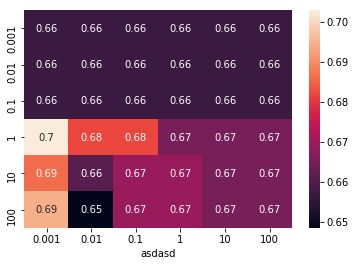

In [107]:
fig = sn.heatmap(data=scores,xticklabels=param_grid[0]['gamma'],
           yticklabels=param_grid[0]['C'],
           annot=True)
# sn.set(xlabel="gamma")
plt.xlabel("asdasd")
plt.show(fig)

In [75]:
# type(param_grid)

list

In [82]:
rbf = param_grid[0]['gamma']
rbf